In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import pickle
import pandas as pd

In [2]:
## Load ensemble results
cong = np.load("data/GA_congress_100000.p")
sen = np.load("data/GA_state_senate_100000.p")
house = np.load("/cluster/tufts/mggg/jmatth03/Georgia/GA_state_house_100000.p")

In [3]:
with open("GA_graph_3_7_1.p", "rb") as f:
    graph = pickle.load(f)

elections = [Election("SEN16", {"Dem": "SEN16D", "Rep": "SEN16R"}),
             Election("PRES16", {"Dem": "PRES16D", "Rep": "PRES16R"})]


ga_updaters = {"population" : Tally("TOTPOP", alias="population"),
               "cut_edges": cut_edges,
               "VAP": Tally("VAP"),
               "WVAP": Tally("WVAP"),
               "HVAP": Tally("HVAP"),
               "BVAP": Tally("BVAP"),
               "HVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["HVAP"].items()},
               "WVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["WVAP"].items()},
               "BVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["BVAP"].items()},
               "BHVAP_perc": lambda p: {k: ((p["HVAP"][k] + p["BVAP"][k]) / v) for k, v in p["VAP"].items()},}

election_updaters = {election.name: election for election in elections}
ga_updaters.update(election_updaters)

sen_part = Partition(graph, assignment="SENDIST", updaters=ga_updaters)
cong_part = Partition(graph, assignment="CONDIST", updaters=ga_updaters)

In [6]:
elections = ["PRES16", "SEN16"]

In [30]:
def competitive_seats(e, results):
    compet = list(map(np.sum, np.logical_and(results["results_{}".format(e.lower())] > 0.45,
                                             results["results_{}".format(e.lower())] < 0.55)))
    return compet

In [4]:
cmap = plt.get_cmap("tab10")

In [13]:
min(list(map(np.sum, cong["BVAP_perc"] > 0.50)))

0

## Trade offs

### Congress

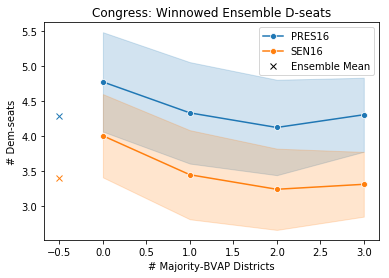

In [53]:
plt.title("Congress: Winnowed Ensemble D-seats")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("# Dem-seats")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, cong["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=cong["seats_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(-0.5, np.mean(cong["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/congress_tradeoffs_D-seats.png",
            bbox_inches="tight", dpi=200)
plt.show()

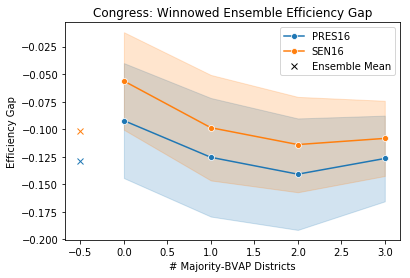

In [49]:
plt.title("Congress: Winnowed Ensemble Efficiency Gap")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Efficiency Gap")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, cong["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=cong["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(-0.5, np.mean(cong["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/congress_tradeoffs_eg.png",
            bbox_inches="tight", dpi=200)
plt.show()

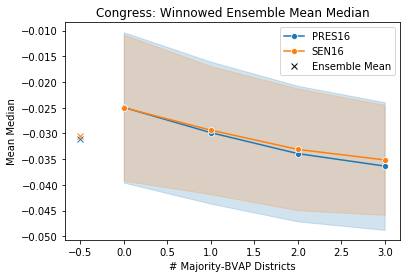

In [50]:
plt.title("Congress: Winnowed Ensemble Mean Median")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Mean Median")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, cong["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=cong["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(-0.5, np.mean(cong["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/congress_tradeoffs_mm.png",
            bbox_inches="tight", dpi=200)
plt.show()

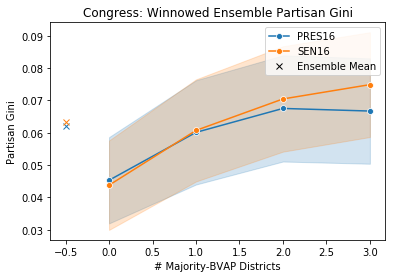

In [51]:
plt.title("Congress: Winnowed Ensemble Partisan Gini")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Partisan Gini")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, cong["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=cong["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(-0.5, np.mean(cong["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/congress_tradeoffs_pg.png",
            bbox_inches="tight", dpi=200)
plt.show()

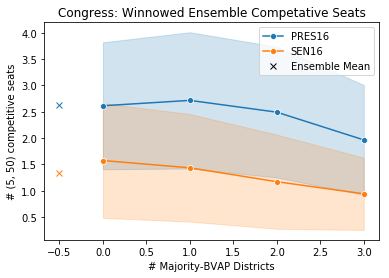

In [52]:
plt.title("Congress: Winnowed Ensemble Competative Seats")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("# (5, 50) competitive seats")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, cong["BVAP_perc"] > 0.50)))
    comp = competitive_seats(e, cong)
    sns.lineplot(x=c, y=comp, marker='o', label=e, ci="sd")
    plt.plot(-0.5, np.mean(comp), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/congress_tradeoffs_compet.png",
            bbox_inches="tight", dpi=200)
plt.show()

### State Senate

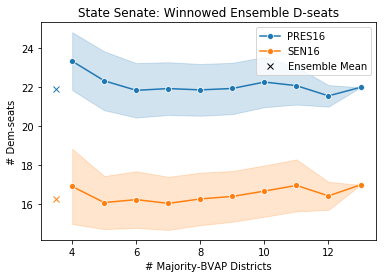

In [55]:
plt.title("State Senate: Winnowed Ensemble D-seats")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("# Dem-seats")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, sen["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=sen["seats_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(3.5, np.mean(sen["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_senate_tradeoffs_D-seats.png",
            bbox_inches="tight", dpi=200)
plt.show()

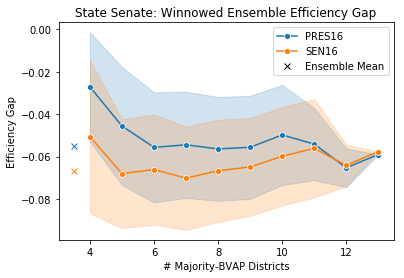

In [56]:
plt.title("State Senate: Winnowed Ensemble Efficiency Gap")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Efficiency Gap")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, sen["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=sen["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(3.5, np.mean(sen["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_senate_tradeoffs_eg.png",
            bbox_inches="tight", dpi=200)
plt.show()

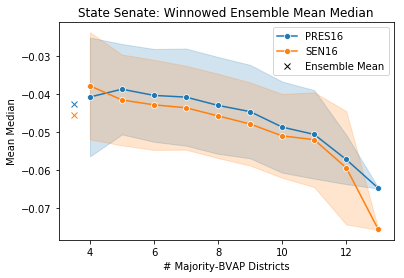

In [57]:
plt.title("State Senate: Winnowed Ensemble Mean Median")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Mean Median")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, sen["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=sen["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(3.5, np.mean(sen["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_senate_tradeoffs_mm.png",
            bbox_inches="tight", dpi=200)
plt.show()

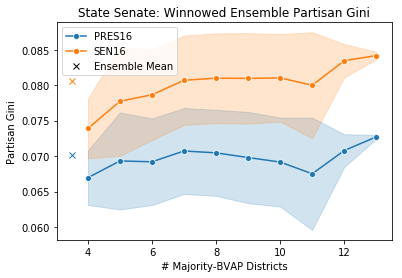

In [58]:
plt.title("State Senate: Winnowed Ensemble Partisan Gini")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Partisan Gini")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, sen["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=sen["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(3.5, np.mean(sen["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/state_senate_tradeoffs_pg.png",
            bbox_inches="tight", dpi=200)
plt.show()

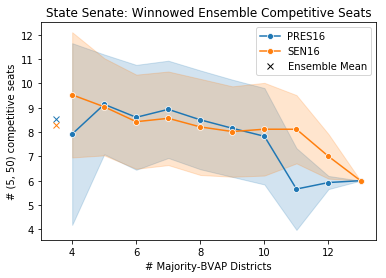

In [60]:
plt.title("State Senate: Winnowed Ensemble Competitive Seats")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("# (5, 50) competitive seats")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, sen["BVAP_perc"] > 0.50)))
    comp = competitive_seats(e, sen)
    sns.lineplot(x=c, y=comp, marker='o', label=e, ci="sd")
    plt.plot(3.5, np.mean(comp), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/state_senate_tradeoffs_compet.png",
            bbox_inches="tight", dpi=200)
plt.show()

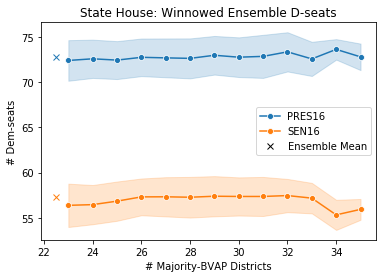

In [62]:
plt.title("State House: Winnowed Ensemble D-seats")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("# Dem-seats")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, house["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=house["seats_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(22.5, np.mean(house["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_house_tradeoffs_D-seats.png",
            bbox_inches="tight", dpi=200)
plt.show()

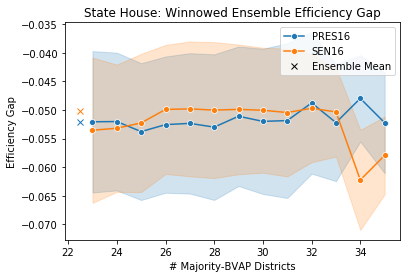

In [64]:
plt.title("State House: Winnowed Ensemble Efficiency Gap")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Efficiency Gap")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, house["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=house["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(22.5, np.mean(house["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_house_tradeoffs_eg.png",
            bbox_inches="tight", dpi=200)
plt.show()

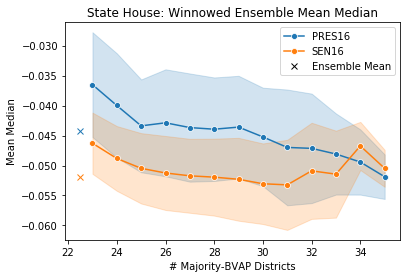

In [65]:
plt.title("State House: Winnowed Ensemble Mean Median")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Mean Median")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, house["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=house["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(22.5, np.mean(house["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_house_tradeoffs_mm.png",
            bbox_inches="tight", dpi=200)
plt.show()

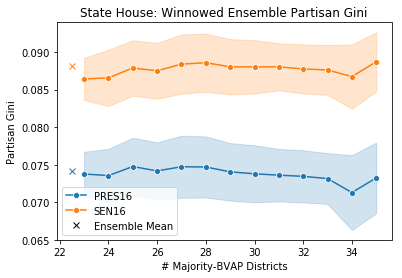

In [66]:
plt.title("State House: Winnowed Ensemble Partisan Gini")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("Partisan Gini")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, house["BVAP_perc"] > 0.50)))
    sns.lineplot(x=c, y=house["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd")
    plt.plot(22.5, np.mean(house["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()

plt.savefig("plots/gingles/state_house_tradeoffs_pg.png",
            bbox_inches="tight", dpi=200)
plt.show()

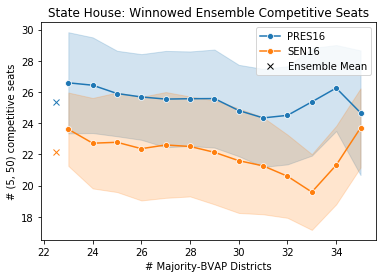

In [63]:
plt.title("State House: Winnowed Ensemble Competitive Seats")
plt.xlabel("# Majority-BVAP Districts")
plt.ylabel("# (5, 50) competitive seats")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, house["BVAP_perc"] > 0.50)))
    comp = competitive_seats(e, house)
    sns.lineplot(x=c, y=comp, marker='o', label=e, ci="sd")
    plt.plot(22.5, np.mean(comp), marker="x", c=cmap(i))

plt.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/gingles/state_house_tradeoffs_compet.png",
            bbox_inches="tight", dpi=200)
plt.show()